## Prevendo doenças cardíacas com Machine Learning 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df_cardio = pd.read_csv("cardio_train.csv", sep=",", index_col=0)

In [35]:
df_cardio

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

In [36]:
df_cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

## 1. Análise geral dos dados

| Feature                                       | Variable Type       | Variable    | Value Type                                       |   |
|-----------------------------------------------|---------------------|-------------|--------------------------------------------------|---|
| Age                                           | Objective Feature   | age         | int (days)                                       |   |
| Height                                        | Objective Feature   | height      | int (cm)                                         |   |
| Weight                                        | Objective Feature   | weight      | float (kg)                                       |   |
| Gender                                        | Objective Feature   | gender      | categorical code                                 |   |
| Systolic blood pressure                       | Examination Feature | ap_hi       | int                                              |   |
| Diastolic blood pressure                      | Examination Feature | ap_lo       | int                                              |   |
| Cholesterol                                   | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |   |
| Glucose                                       | Examination Feature | gluc        | 1: normal, 2: above normal, 3: well above normal |   |
| Smoking                                       | Subjective Feature  | smoke       | binary                                           |   |
| Alcohol intake                                | Subjective Feature  | alco        | binary                                           |   |
| Physical activity                             | Subjective Feature  | active      | binary                                           |   |
| Presence or absence of cardiovascular disease | Target Variable     | cardio      | binary                                           |   |

In [37]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [38]:
df_cardio.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [45]:
df_cardio.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 2. Análise exploratória dos dados (EDA)

In [46]:
df_cardio.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

### 2.1. Dados numéricos

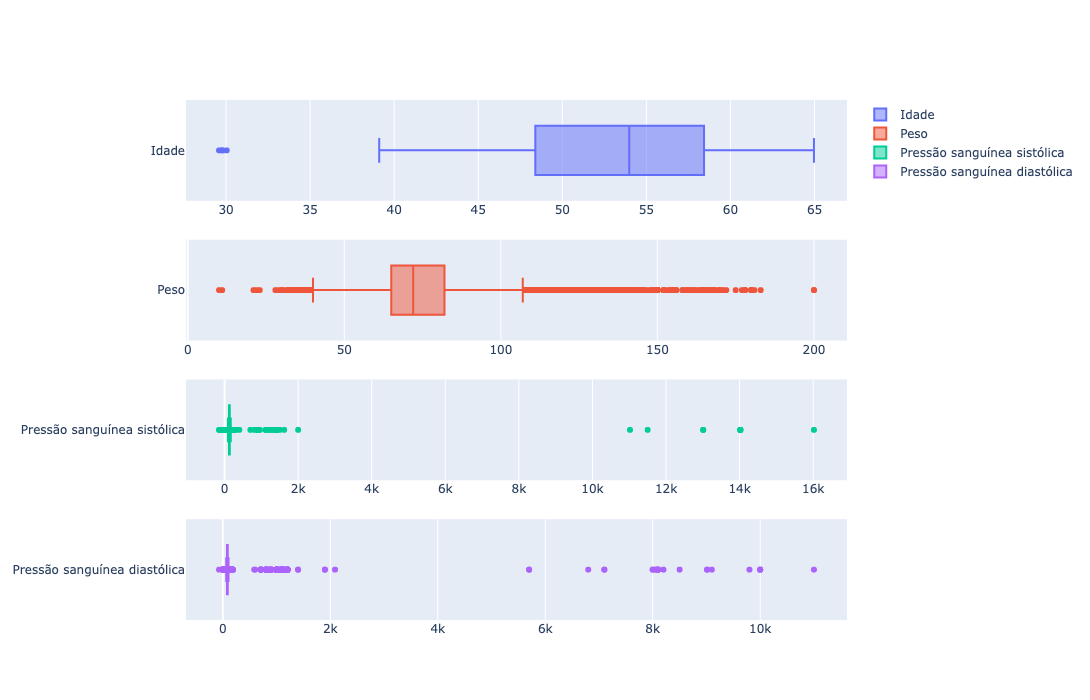

In [49]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)
fig.add_trace(go.Box(x=df_cardio["age"]/365, name="Idade"), row=1, col=1)
fig.add_trace(go.Box(x=df_cardio["weight"], name="Peso"), row=2, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_hi"], name="Pressão sanguínea sistólica"), row=3, col=1)
fig.add_trace(go.Box(x=df_cardio["ap_lo"], name="Pressão sanguínea diastólica"), row=4, col=1)

fig.update_layout(height=700)
fig.show()

### 2.2. Dados categóricos

In [50]:
df_cardio["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

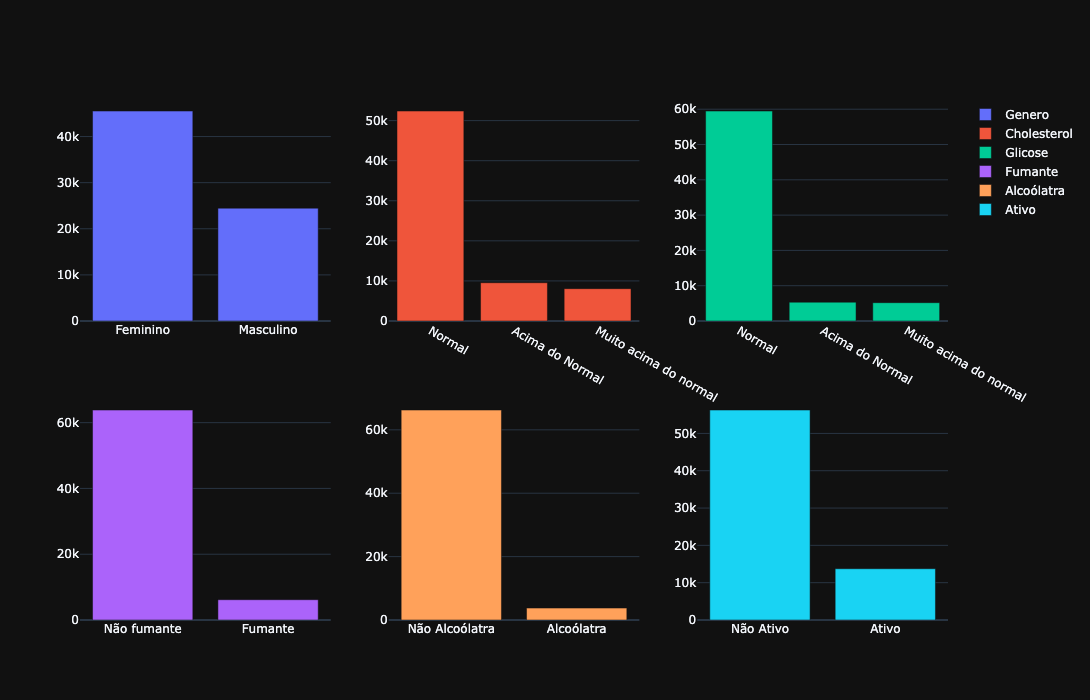

In [52]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Bar(y=df_cardio["gender"].value_counts(), x=["Feminino", "Masculino"], name="Genero"), row=1, col=1)
fig.add_trace(go.Bar(y=df_cardio["cholesterol"].value_counts(), x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Cholesterol"), row=1, col=2)
fig.add_trace(go.Bar(y=df_cardio["gluc"].value_counts(), x=["Normal", "Acima do Normal", "Muito acima do normal"], name="Glicose"), row=1, col=3)
fig.add_trace(go.Bar(y=df_cardio["smoke"].value_counts(), x=["Não fumante", "Fumante"], name="Fumante"), row=2, col=1)
fig.add_trace(go.Bar(y=df_cardio["alco"].value_counts(), x=["Não Alcoólatra", "Alcoólatra"], name="Alcoólatra"), row=2, col=2)
fig.add_trace(go.Bar(y=df_cardio["active"].value_counts(), x=["Não Ativo", "Ativo"], name="Ativo"), row=2, col=3)

fig.update_layout(template="plotly_dark", height=700)
fig.show()

In [54]:
df_cardio["cardio"].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [57]:
df_cardio.groupby(["smoke", "cardio"]).count()["id"]

smoke  cardio
0      0         31781
       1         32050
1      0          3240
       1          2929
Name: id, dtype: int64

## 3. Machine Learning

### 3.1. Preparação dos dados

In [58]:
Y = df_cardio["cardio"]
X = df_cardio.loc[:, df_cardio.columns != 'cardio']

In [61]:
X

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  
0          0     0       1  
1          0     0       1  
2          0     0       0  
3          0     0       1  
4          0     0       0  
...      ...   ...     ...  
69995      1     0       1  
69996      0     0       1  
69997      0     1       0  
69998      0     0       0  
69999      0     0       1  

[70000 rows x 12 columns]

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### 3.2. Treinamento do modelo

In [69]:
from sklearn.ensemble import RandomForestClassifier

ml_model = RandomForestClassifier(n_estimators=20, n_jobs=4, max_depth=4, )
ml_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20, n_jobs=4)

In [74]:
x_test.iloc[1].to_frame().transpose()

id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
48393  69098.0  21876.0     1.0   170.0    85.0  160.0   90.0          1.0   

       gluc  smoke  alco  active  
48393   1.0    0.0   0.0     1.0

In [75]:
ml_model.predict(x_test.iloc[1].to_frame().transpose())

array([1])

In [76]:
y_train.iloc[1]

0

### 3.3. Avaliação do modelo

In [77]:
predictions = ml_model.predict(x_test)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     11506
           1       0.77      0.66      0.71     11594

    accuracy                           0.73     23100
   macro avg       0.73      0.73      0.73     23100
weighted avg       0.73      0.73      0.73     23100

[[9199 2307]
 [3949 7645]]


### 3.4. Feature importance

In [82]:
from sklearn.inspection import permutation_importance

result = permutation_importance(ml_model, x_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

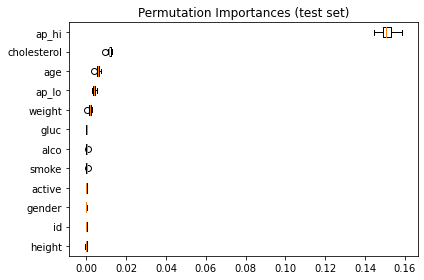

In [83]:
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [84]:
import shap
explainer = shap.TreeExplainer(ml_model)

In [85]:
shap_values = explainer.shap_values(X)

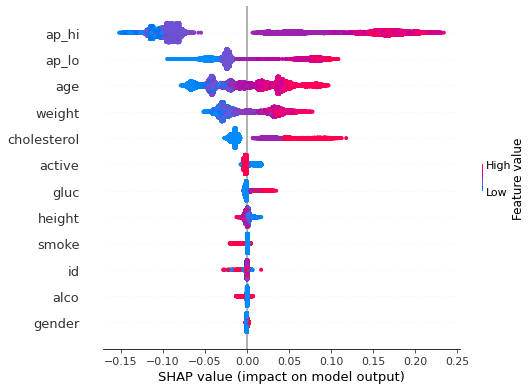

## 4. Conclusões